In [126]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as smp
import math
import mpmath as mp

In [127]:
def probability(k, n, rho, i):
    # besseli_vec = np.frompyfunc(mp.besseli, 2, 1)
    prob = np.exp(-n*(1+1/rho))*(
        rho**((k-i)/2)*mp.besseli(k-i, 2*n/math.sqrt(rho))  +  
        rho**((k-i-1)/2)*mp.besseli(k+i+1, 2*n/math.sqrt(rho)) +
        (1-rho)*rho**k*mp.nsum(lambda j: rho**(-j/2)*mp.besseli(j, 2*n/math.sqrt(rho)), [k+i+2, inf]))
    return prob

def constant(variable, constant):
    return constant

# euler = nsum(lambda x: 1/math.factorial(x), [0, inf])

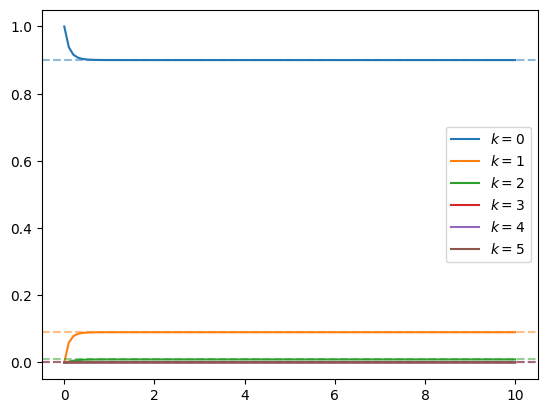

In [128]:
rho = 0.1
i = 0
maxNumberN = 10
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1


for k in range(6):
    plt.plot(n, probK(k, n, rho, i), label='$k = {k}$'.format(k=k))
    limit_value = (1-rho)*rho**k
    plt.axhline(y=limit_value, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.legend(loc='best')
plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))
plt.show()


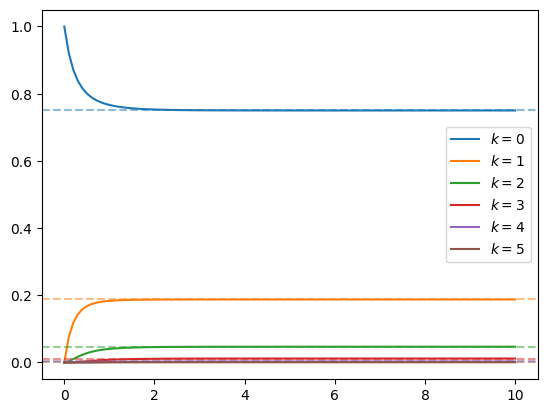

In [129]:
rho = 0.25
i = 0
maxNumberN = 10
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

for k in range(6):
    plt.plot(n, probK(k, n, rho, i), label='$k = {k}$'.format(k=k))
    limit_value = (1-rho)*rho**k
    plt.axhline(y=limit_value, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.legend(loc='best')
plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))
plt.show()


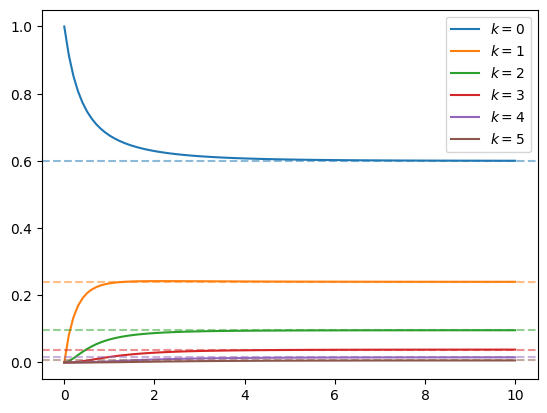

In [130]:
rho = 0.4
i = 0
maxNumberN = 10
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

for k in range(6):
    plt.plot(n, probK(k, n, rho, i), label='$k = {k}$'.format(k=k))
    limit_value = (1-rho)*rho**k
    plt.axhline(y=limit_value, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.legend(loc='best')
plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))
plt.show()


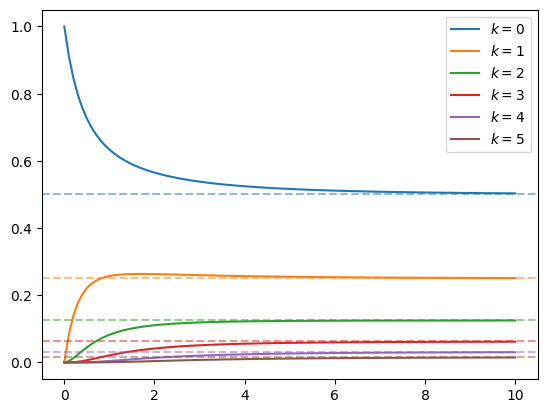

In [131]:
rho = 0.5
i = 0
maxNumberN = 10
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

for k in range(6):
    plt.plot(n, probK(k, n, rho, i), label='$k = {k}$'.format(k=k))
    limit_value = (1-rho)*rho**k
    plt.axhline(y=limit_value, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.legend(loc='best')
plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))
plt.show()


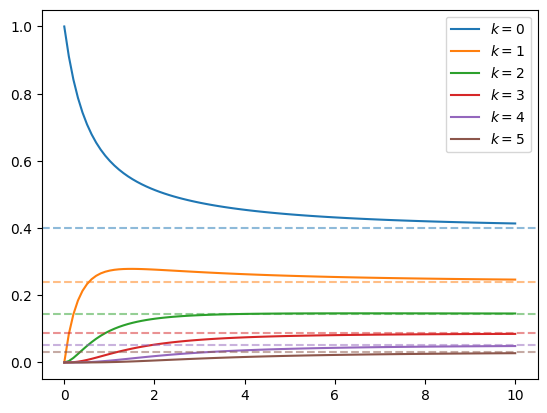

In [132]:
rho = 0.6
i = 0
maxNumberN = 10
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

for k in range(6):
    plt.plot(n, probK(k, n, rho, i), label='$k = {k}$'.format(k=k))
    limit_value = (1-rho)*rho**k
    plt.axhline(y=limit_value, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.legend(loc='best')
plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))
plt.show()


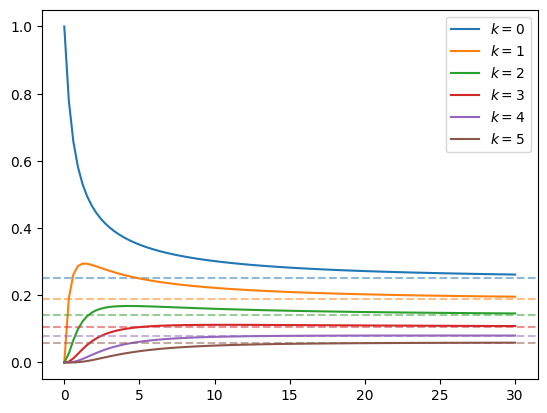

In [133]:
rho = 0.75
i = 0
maxNumberN = 30
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

for k in range(6):
    plt.plot(n, probK(k, n, rho, i), label='$k = {k}$'.format(k=k))
    limit_value = (1-rho)*rho**k
    plt.axhline(y=limit_value, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.legend(loc='best')
plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))
plt.show()


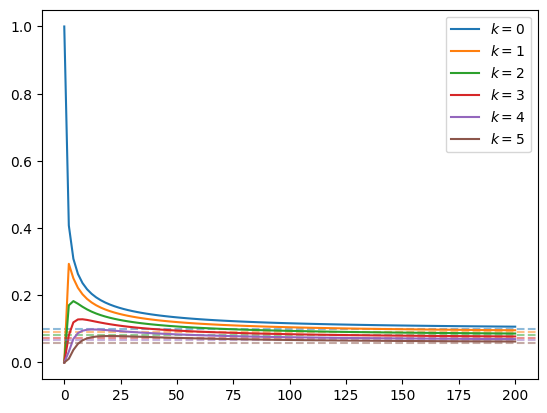

In [134]:
rho = 0.9
i = 0
maxNumberN = 200
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

for k in range(6):
    plt.plot(n, probK(k, n, rho, i), label='$k = {k}$'.format(k=k))
    limit_value = (1-rho)*rho**k
    plt.axhline(y=limit_value, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.legend(loc='best')
plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))
plt.show()


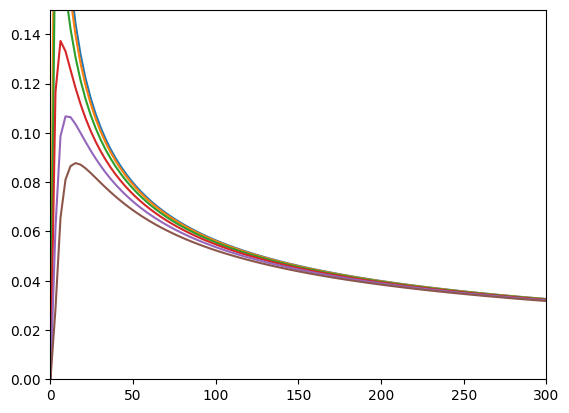

In [135]:
rho = 1
i = 0
maxNumberN = 300
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

ax = plt.gca()
ax.set_xlim([0, maxNumberN])
ax.set_ylim([0, 0.15])

for k in range(6):
    plt.plot(n, probK(k, n, rho, i))

plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))


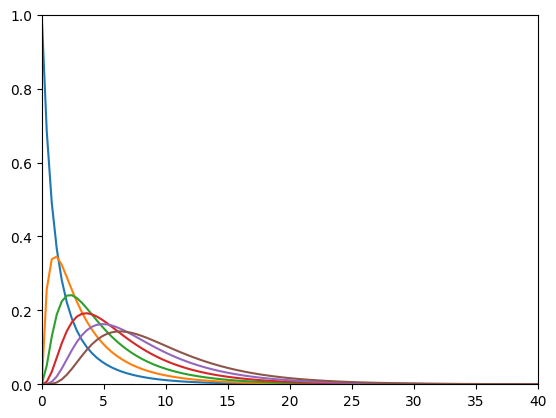

In [136]:
rho = 3
i = 0
maxNumberN = 40
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

ax = plt.gca()
ax.set_xlim([0, maxNumberN])
ax.set_ylim([0, 1])

for k in range(6):
    plt.plot(n, probK(k, n, rho, i))

plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))


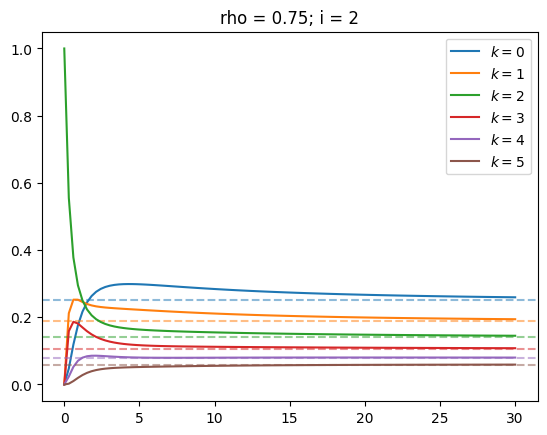

In [139]:
rho = 0.75
i = 2
maxNumberN = 30
n_steps = 100
n = np.linspace(0, maxNumberN, n_steps)
probK = np.vectorize(probability)
k = 1

for k in range(6):
    plt.plot(n, probK(k, n, rho, i), label='$k = {k}$'.format(k=k))
    limit_value = (1-rho)*rho**k
    plt.axhline(y=limit_value, color=plt.gca().lines[-1].get_color(), linestyle='--', alpha=0.5)

plt.legend(loc='best')
plt.title('rho = {rho}; i = {i};'.format(rho = rho, i = i))
plt.show()
